In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import datetime
import yfinance as yf

In [4]:
# I will use the function I created earlier to
# compute volatility for the S&P500

def wills_volatility(ticker):
    x = yf.Ticker(ticker).history(period='MAX')
    ans = []
    high = x['High']
    low = x['Low']
    mean = (abs(high)+abs(low))/2
    dr = abs(high-low)
    ans = (((dr/mean)*1000)+10)
    hi = pd.DataFrame(data=x)
    hi['Wills Volatility Measure'] = ans
    hi['Date'] = hi.index
    return(hi)

In [31]:
SandP500 = wills_volatility("^GSPC")
SandP500.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Wills Volatility Measure,Date
Date,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0,10.0,1950-01-03
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0,10.0,1950-01-04
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0,10.0,1950-01-05
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0,10.0,1950-01-06
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0,10.0,1950-01-09


In [32]:
# I will drop values up to 1979 to align with my weather dataset
SandP500 = SandP500.loc['1979-01-01':'2021-10-06']
SandP500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Wills Volatility Measure,Date
Date,,,,,,,,,
1979-01-02,0.000000,96.959999,95.220001,96.730003,18340000,0,0,28.108001,1979-01-02
1979-01-03,0.000000,98.540001,96.809998,97.800003,29180000,0,0,27.711834,1979-01-03
1979-01-04,0.000000,99.419998,97.519997,98.580002,33290000,0,0,29.295233,1979-01-04
1979-01-05,0.000000,99.790001,98.250000,99.129997,28890000,0,0,25.552423,1979-01-05
1979-01-08,0.000000,99.300003,97.830002,98.800003,21440000,0,0,24.914028,1979-01-08
...,...,...,...,...,...,...,...,...,...
2021-09-30,4370.669922,4382.549805,4306.240234,4307.540039,3123770000,0,0,27.565063,2021-09-30
2021-10-01,4317.160156,4375.189941,4288.520020,4357.040039,3148980000,0,0,30.007577,2021-10-01
2021-10-04,4348.839844,4355.509766,4278.939941,4300.459961,3110560000,0,0,27.735890,2021-10-04


In [33]:
# I will calculate yearly volatility average (there are 252 trading days per year)
box = [] 
for x in range(252,len(SandP500),252):
    box.append((sum(SandP500['Wills Volatility Measure'][x-252:x])/252))

In [34]:
print(box)

[25.487155824015606, 32.06698368148049, 30.36847171504647, 26.111426833945078, 20.1161881967791, 19.958364888814724, 17.868270927229307, 21.22417891584374, 27.707086918703283, 22.443824744492154, 19.47455982755814, 23.191739008594652, 20.89143552214334, 18.46553671105476, 17.175066166424358, 18.140224079203826, 17.144213789669564, 19.804757055797833, 24.18548721818344, 25.828586379995002, 25.66054946947527, 27.864069161657575, 27.985427946820874, 30.577041942486122, 24.491378298311584, 19.567579169414056, 18.76269502079709, 18.54698493028558, 21.490316004431744, 36.861794952812204, 30.90668709975659, 23.70522486509715, 25.81012258681431, 20.68428926657924, 18.706084377429697, 18.52137127982818, 20.976852366175176, 19.755661003682665, 15.15935456875029, 21.089919527308304, 19.258560931067912, 26.940787090835872]


In [35]:
# Read in weather events data to align
data = pd.read_csv('time-series-US-1980-2021.csv')
data['yearly average volatility'] = box # adds yearly mean volatilities to dataframe
df = data

<ipython-input-36-65df1334b7ab>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


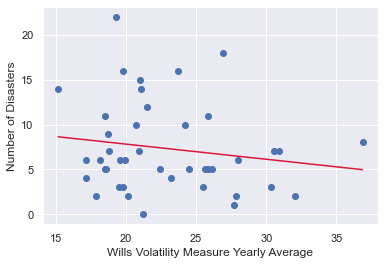

<Figure size 288x288 with 0 Axes>

In [36]:
# Now I can regress year number of climate disasters on volatility

x = df['yearly average volatility']
y = df['All Disasters Count']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Wills Volatility Measure Yearly Average')
plt.ylabel('Number of Disasters')
plt.figure(figsize=(4,4))
plt.savefig("volatility.png")